In [24]:
# 1. Delete row if dataset is very large and few missing feature value
# 2. Create a new model. Missing features are my test set. Take known features as input to train a model. Use that model to obtain missing features.
# 3. Mean/median/mode replaces missing value
# We are doing with 3rd

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


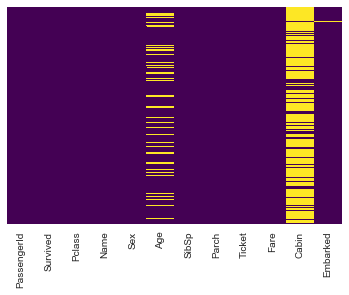

In [28]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

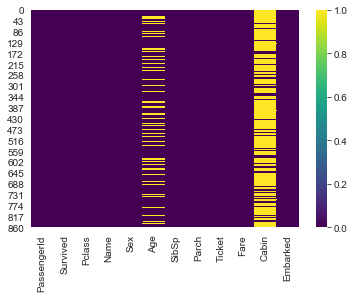

In [29]:
sns.heatmap(train.isnull(),cmap='viridis')

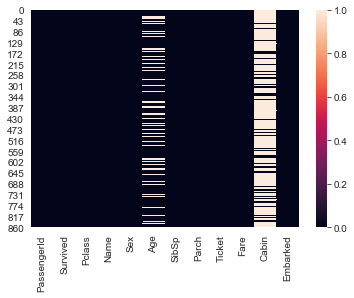

In [30]:
sns.heatmap(train.isnull())

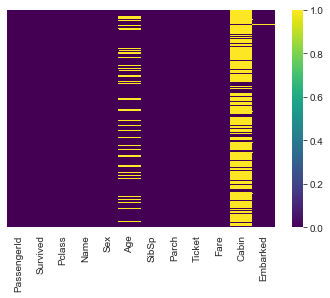

In [31]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

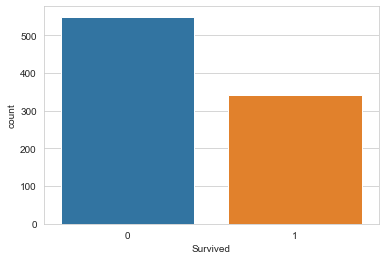

In [32]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train) # 0 is died 

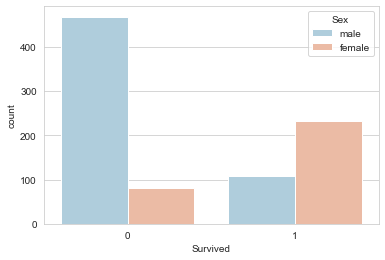

In [33]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

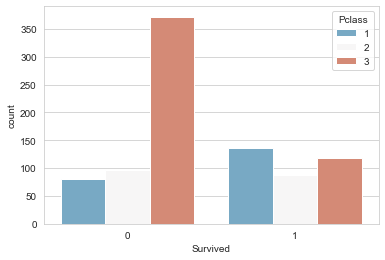

In [34]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='RdBu_r')

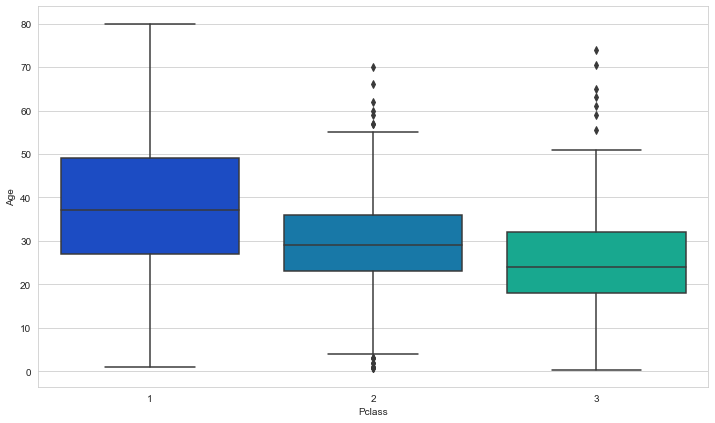

In [35]:
# To fill missing age
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [36]:
# Each passenger class has median which can be applied to missing value

In [37]:
def import_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 28
        else:
            return 24
    else:
        return Age

In [38]:
# Applying above function
train['Age'] = train[['Age','Pclass']].apply(import_age,axis=1)

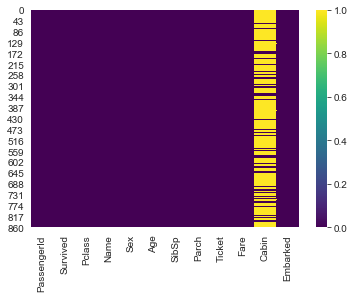

In [39]:
sns.heatmap(train.isnull(),cmap='viridis')

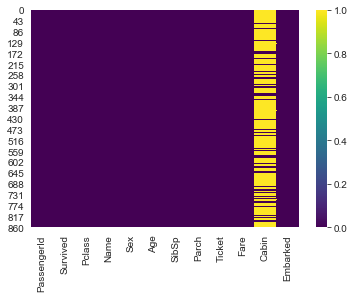

In [40]:
def import_age(cols):
    Age = cols[1]
    Pclass = cols[0]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 28
        else:
            return 24
    else:
        return Age
# Applying above function
train['Age'] = train[['Age','Pclass']].apply(import_age,axis=1)    
sns.heatmap(train.isnull(),cmap='viridis')

In [41]:
def import_age(cols):
    Age = cols
    Pclass = cols
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 28
        else:
            return 24
    else:
        return Age
# Applying above function
train['Age'] = train[['Age','Pclass']].apply(import_age,axis=1)    
sns.heatmap(train.isnull(),cmap='viridis')

ValueError: ('The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().', 'occurred at index 0')

In [42]:
def import_age(cols):
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 28
        else:
            return 24
    else:
        return Age
# Applying above function
train['Age'] = train[['Age','Pclass']].apply(import_age,axis=1)    
sns.heatmap(train.isnull(),cmap='viridis')

NameError: ("name 'Age' is not defined", 'occurred at index 0')

In [43]:
# For cabin you need expertise.

In [44]:
def import_age(Age,Pclass):
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 28
        else:
            return 24
    else:
        return Age
# Applying above function
train['Age'] = train[['Age','Pclass']].apply(import_age,axis=1)    
sns.heatmap(train.isnull(),cmap='viridis')

TypeError: ("import_age() missing 1 required positional argument: 'Pclass'", 'occurred at index 0')

In [45]:
def import_age(Age[0],Pclass[1]):
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 28
        else:
            return 24
    else:
        return Age
# Applying above function
train['Age'] = train[['Age','Pclass']].apply(import_age,axis=1)    
sns.heatmap(train.isnull(),cmap='viridis')

SyntaxError: invalid syntax (<ipython-input-45-5dca3a3841f2>, line 1)

In [46]:
def import_age('Age','Pclass'):
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 28
        else:
            return 24
    else:
        return Age
# Applying above function
train['Age'] = train[['Age','Pclass']].apply(import_age,axis=1)    
sns.heatmap(train.isnull(),cmap='viridis')

SyntaxError: invalid syntax (<ipython-input-46-eb59ff68fcc5>, line 1)

In [47]:
def import_age(train[['Age','Pclass']]):
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 28
        else:
            return 24
    else:
        return Age
# Applying above function
train['Age'] = train[['Age','Pclass']].apply(import_age,axis=1)    
sns.heatmap(train.isnull(),cmap='viridis')

SyntaxError: invalid syntax (<ipython-input-47-f5705143c6b8>, line 1)